In [28]:
# importamos las librerias a usar / import the libraries we need

import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# configurar pandas / pandas configuration

pd.set_option('display.max_columns', None)

In [30]:
# generar dataframe por tipo de accion (denuncias, detenciones y aprehensiones) / create dataframe by action type (complaints, arrests and apprehensions)

df_denuncias = pd.read_csv('/workspaces/Reporte-Delitos-Chile/REDDEN.csv')
df_detenciones = pd.read_csv('/workspaces/Reporte-Delitos-Chile/REDDET.csv')
df_aprehensiones = pd.read_csv('/workspaces/Reporte-Delitos-Chile/REDAPR.csv')


In [31]:
# drop de elementos que no se analizarán / drop of columns we are not going to use 

df_denuncias.drop(columns=['Delitos de mayor connotación social', 'Infracción a ley de armas', 'Porte de armas', 'Abusos sexuales y otros delitos sexuales'], axis=1, inplace=True)
df_detenciones.drop(columns=['Delitos de mayor connotación social', 'Infracción a ley de armas', 'Porte de armas', 'Abusos sexuales y otros delitos sexuales'], axis=1, inplace=True)
df_aprehensiones.drop(columns=['Delitos de mayor connotación social', 'Infracción a ley de armas', 'Porte de armas', 'Abusos sexuales y otros delitos sexuales'], axis=1, inplace=True)

In [32]:
# cambio en nombre para reconocer tipo de acción en cada delito / change in name to recognize the type of action associated with each crime

df_denuncias.columns = ['Año', 'Denuncias de Homicidio', 'Denuncias de Robo con Violencia', 'Denuncias de Robo de Vehículo', 'Denuncias de Robo en lugar habitado', 'Denuncias de Violaciones', 'Denuncias de Violencia intrafamiliar', 'Denuncias de Violencia intrafamiliar a adulto mayor', 'Denuncias de Violencia intrafamiliar a hombre', 'Denuncias de Violencia intrafamiliar a mujer', 'Denuncias de Violencia intrafamiliar a niño']
df_detenciones.columns = ['Año', 'Detenciones de Homicidio', 'Detenciones de Robo con Violencia', 'Detenciones de Robo de Vehículo', 'Detenciones de Robo en lugar habitado', 'Detenciones de Violaciones', 'Detenciones de Violencia intrafamiliar', 'Detenciones de Violencia intrafamiliar a adulto mayor', 'Detenciones de Violencia intrafamiliar a hombre', 'Detenciones de Violencia intrafamiliar a mujer', 'Detenciones de Violencia intrafamiliar a niño']
df_aprehensiones.columns = ['Año', 'Aprehensiones de Homicidio', 'Aprehensiones de Robo con Violencia', 'Aprehensiones de Robo de Vehículo', 'Aprehensiones de Robo en lugar habitado', 'Aprehensiones de Violaciones', 'Aprehensiones de Violencia intrafamiliar', 'Aprehensiones de Violencia intrafamiliar a adulto mayor', 'Aprehensiones de Violencia intrafamiliar a hombre', 'Aprehensiones de Violencia intrafamiliar a mujer', 'Aprehensiones de Violencia intrafamiliar a niño']


In [33]:
# merger los dataframes en uno / merge each dataframe into a single one

first_merge_df = pd.merge(df_denuncias, df_detenciones, on='Año', how='inner')
merged_df = pd.merge(first_merge_df, df_aprehensiones, on='Año', how='inner')

In [34]:
# clase para trabajar por tipo de accion / class creation to work with action types

class Ploteoaccion():
    def __init__(self, df_accion, accion):
        self.df = df_accion
        self.nombre_grafico = f'{accion} de distintos delitos desde 2005'

        plt.figure(figsize=(12, 6))
        plt.xticks(self.df['Año'], self.df['Año'])

        plt.plot(self.df['Año'], self.df.iloc[:, 1], label='Homicidio', marker='o')
        plt.plot(self.df['Año'], self.df.iloc[:, 2], label='Robo con Violencia', marker='s')
        plt.plot(self.df['Año'], self.df.iloc[:, 3], label='Robo de Vehiculo', marker='^')
        plt.plot(self.df['Año'], self.df.iloc[:, 4], label='Robo en lugar habitado', marker='d')
        plt.plot(self.df['Año'], self.df.iloc[:, 5], label='Violaciones', marker='x')
        plt.plot(self.df['Año'], self.df.iloc[:, 6], label='Violencia intrafamiliar', marker="v")

        plt.title(self.nombre_grafico)
        plt.xlabel('Año')
        plt.ylabel('Cantidad')
        plt.grid(True)
        plt.legend()
        plt.show()

In [35]:
# lista de dataframes y acciones que usaremos en la clase recien creada (dos argumentos) / list with the dataframes and actions to use in the recent created class (two arguments)
dataframes_acciones = [
    (df_denuncias, 'Denuncias'),
    (df_detenciones, 'Detenciones'),
    (df_aprehensiones, 'Aprehensiones'),
]

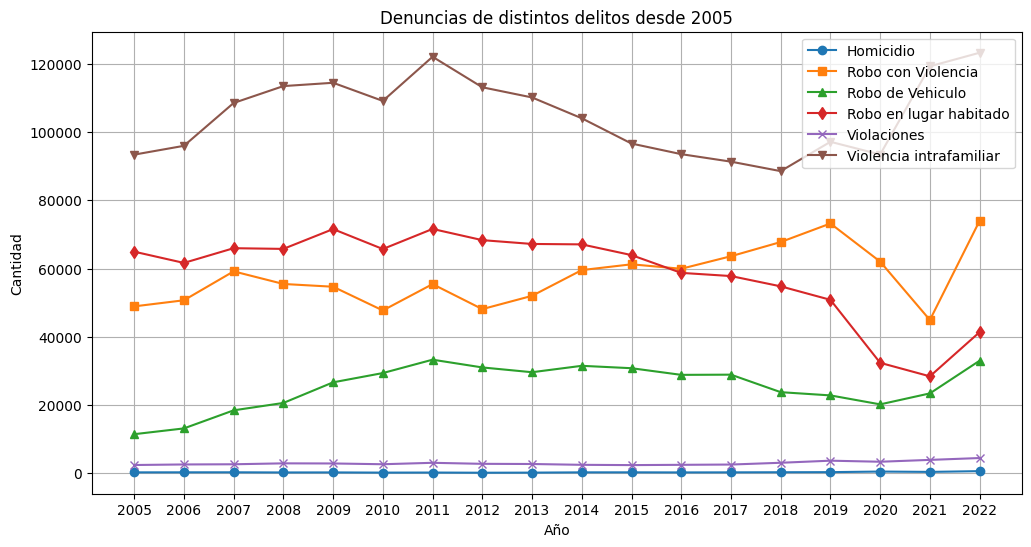

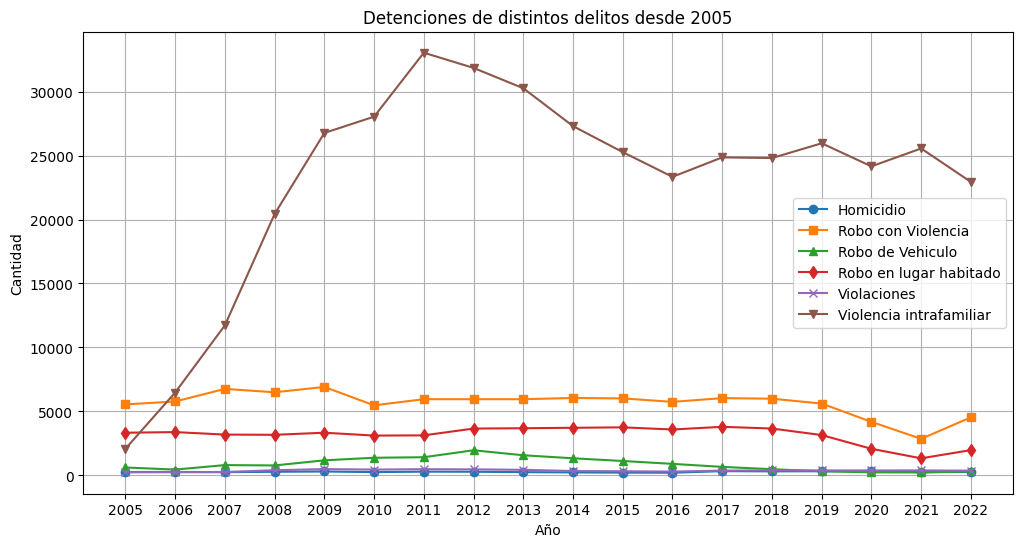

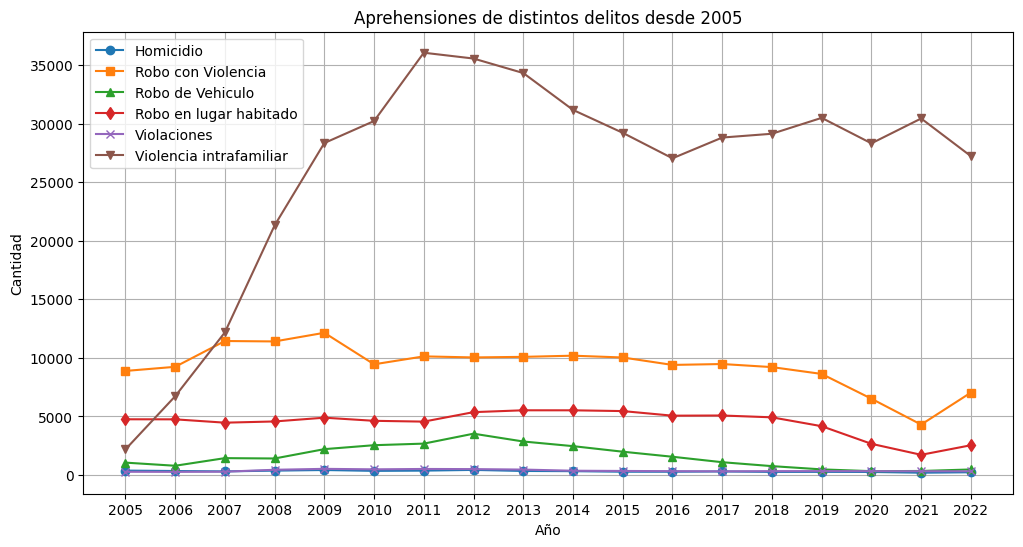

In [36]:
# ploteo de cada accion tomada por tipos de delitos / plotting for every action by type of crime

for dataframe, accion in dataframes_acciones:
    Ploteoaccion(dataframe, accion)

In [37]:
# clase para trabajar cada delito (creacion de df, y ploteo) / new class to plot different crimes

class Ploteodelito():
    def __init__(self, merged_df, delito):
        self.df = merged_df[['Año', f'Denuncias {delito}', f'Detenciones {delito}', f'Aprehensiones {delito}']]
        self.nombre_grafico = f'Delitos {delito} desde 2005'

        plt.figure(figsize=(12, 6))
        plt.xticks(self.df['Año'], self.df['Año'])

        plt.plot(self.df['Año'], self.df.iloc[:, 1], label='Denuncias', marker='o')
        plt.plot(self.df['Año'], self.df.iloc[:, 2], label='Detenciones', marker='s')
        plt.plot(self.df['Año'], self.df.iloc[:, 3], label='Aprehensiones', marker='^')

        plt.title(self.nombre_grafico)
        plt.xlabel('Año')
        plt.ylabel('Cantidad')
        plt.grid(True)
        plt.legend()
        plt.show()

In [38]:
# ingresamos lista de delitos dentro de merged_df para crear cada df unico y plotear / list of crimes to use in the recent created class

lista_delitos = [
    'de Homicidio',
    'de Robo con Violencia',
    'de Robo de Vehículo',
    'de Robo en lugar habitado',
    'de Violaciones',
    'de Violencia intrafamiliar',
    'de Violencia intrafamiliar a hombre',
    'de Violencia intrafamiliar a mujer',
    'de Violencia intrafamiliar a niño',
]

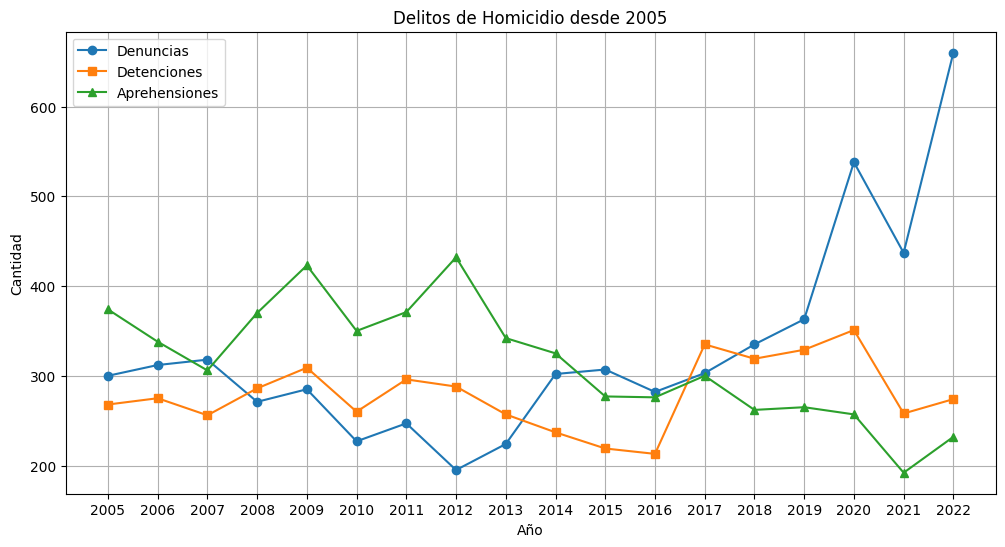

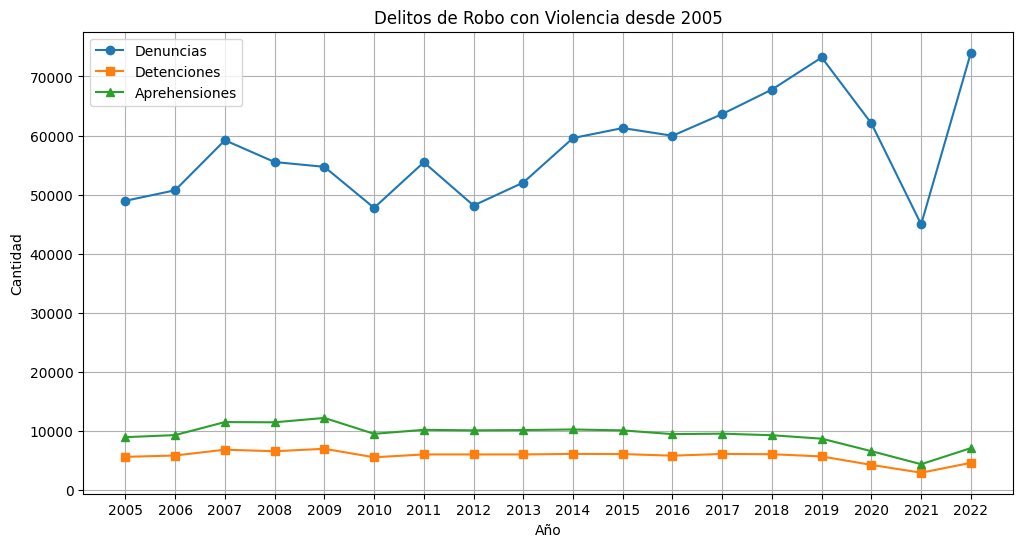

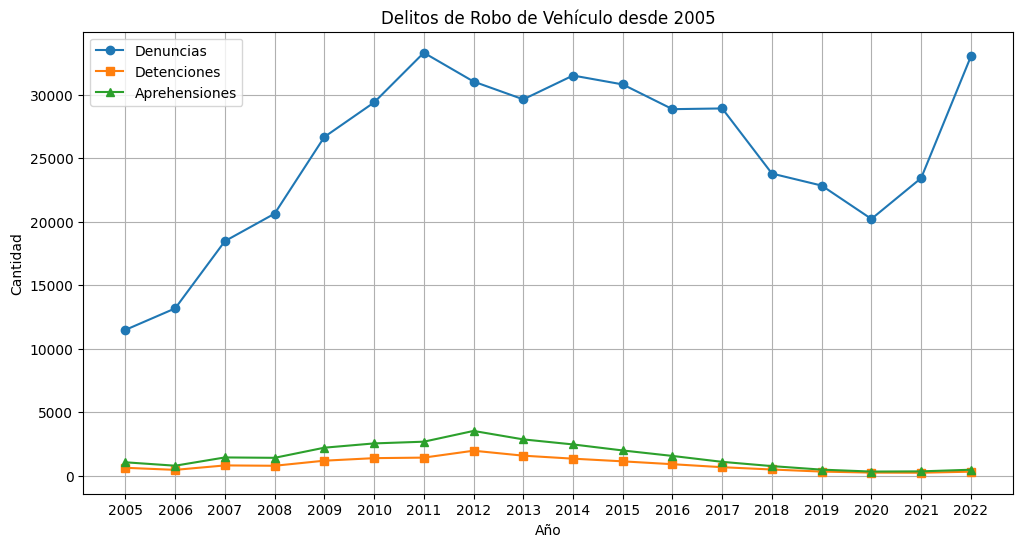

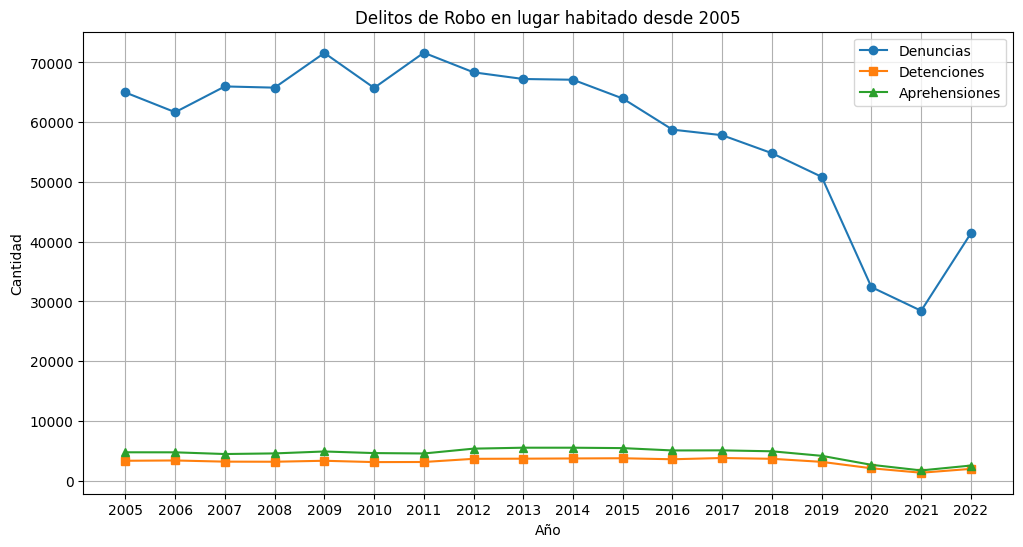

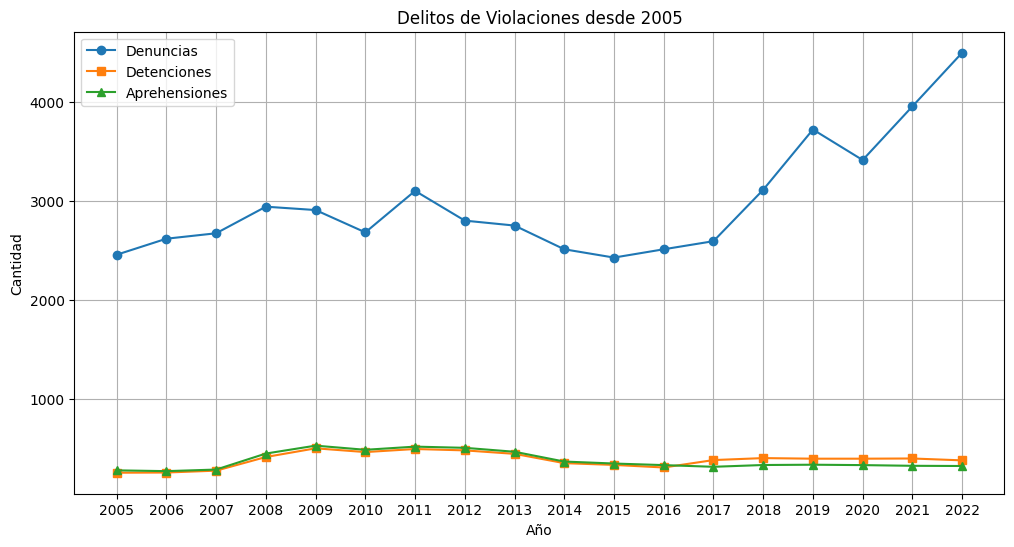

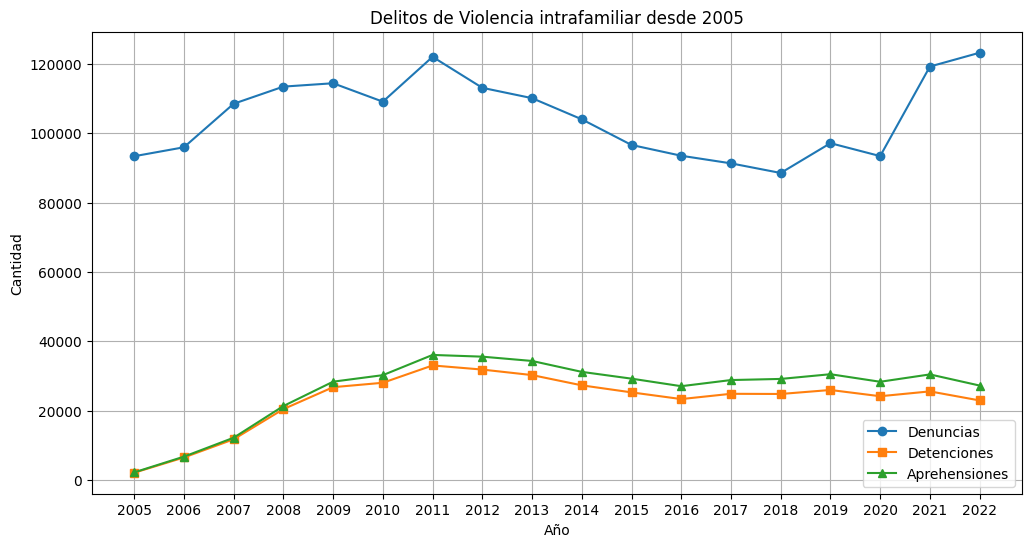

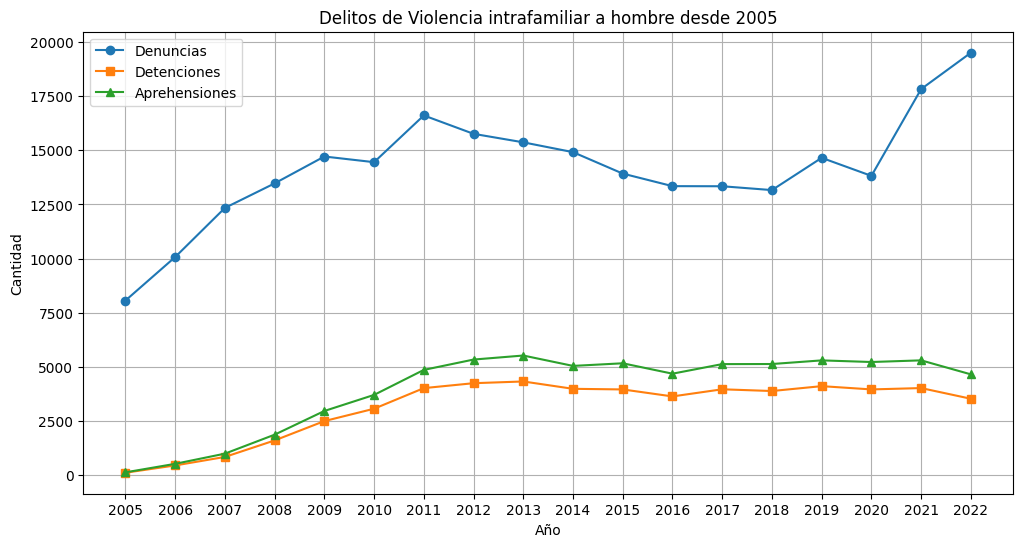

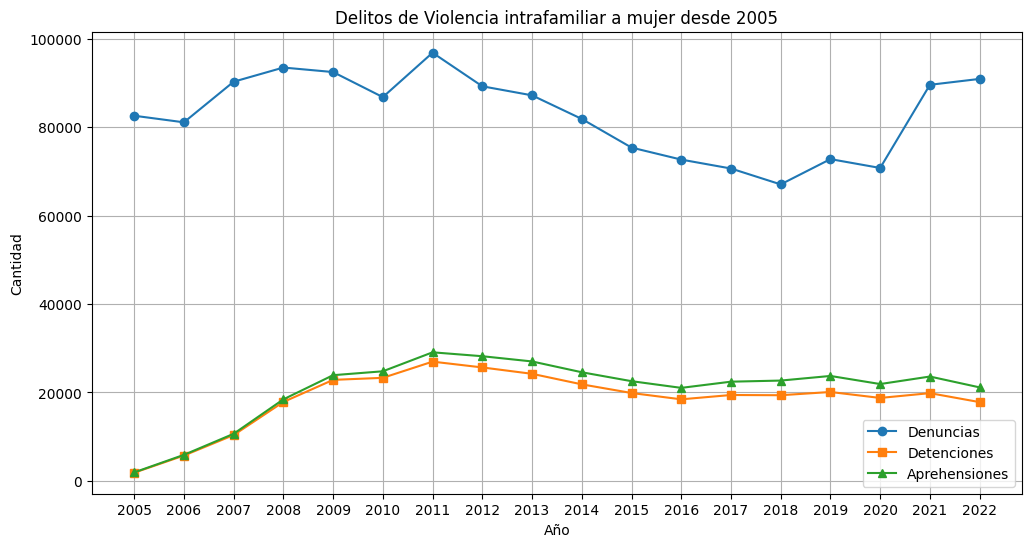

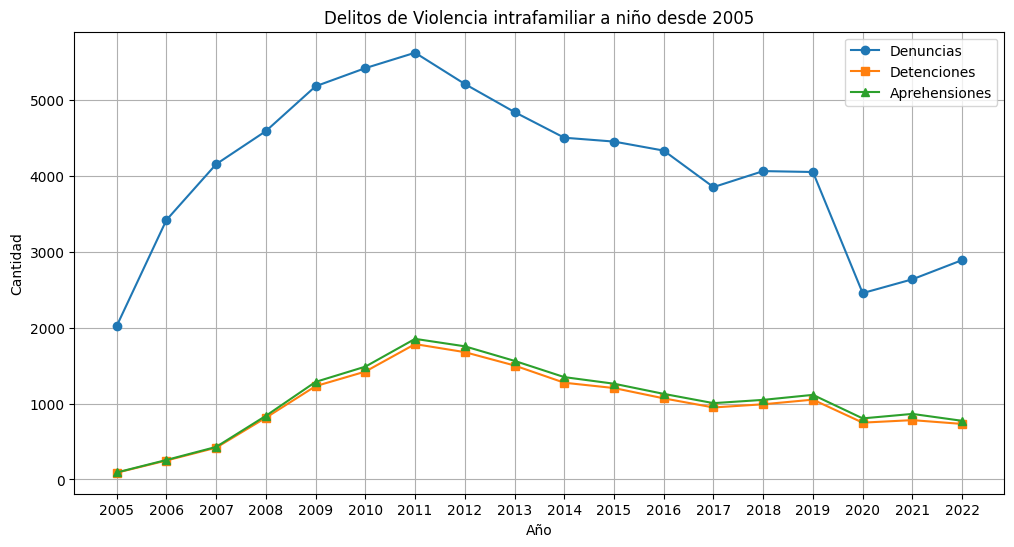

In [39]:
# por cada delito en la lista, lo usaremos como argumento para la clase de ploteo / for every crime in the "lista_delitos" list, we are going to use it as an argument for the class

for delito in lista_delitos:
    Ploteodelito(merged_df, delito)

In [40]:
# Gráficos de relación entre delitos: denuncias sobre detenciones / plotting of relation between crimes: complaints over arrests

class Ploteorelacion():
    def __init__(self, delito):
        self.denuncia = f'Denuncias de {delito}'
        self.detencion = f'Detenciones de {delito}'
        self.aprehension = f'Aprehensiones de {delito}'
        self.nombre = delito

    def calcular_ratio(self):
        df_relacion = merged_df[self.denuncia]/((merged_df[self.detencion]+merged_df[self.aprehension]))
        return df_relacion

    def ploteo(self, df_relaciondeldelito):
        plt.plot(merged_df['Año'], df_relaciondeldelito, label=self.nombre)
        plt.title('Relación denuncias / flagrancias')
        plt.xlabel('Año')
        plt.ylabel('Ratio')
        plt.grid(True)
        plt.legend()

In [41]:
# lista de delitos para ratio / list of crimes for the ratio
lista_ratio = [
    'Homicidio',
    'Robo de Vehículo',
    'Violaciones',
    'Violencia intrafamiliar',
]

In [42]:
# antes de iterar inicializamos una lista para el ploteo / before iterating we initialize a blank list for plotting
graficos_delitos = []

for delito in lista_ratio:
    ploteoratio = Ploteorelacion(delito)
    df_resultadorelacion = ploteoratio.calcular_ratio()
    graficos_delitos.append(df_resultadorelacion)

[0     0.467290
1     0.508972
2     0.565836
3     0.413110
4     0.389344
5     0.372131
6     0.370315
7     0.270833
8     0.373957
9     0.537367
10    0.618952
11    0.576687
12    0.477165
13    0.576592
14    0.611111
15    0.884868
16    0.971111
17    1.304348
dtype: float64, 0      6.849135
1     10.577047
2      8.222074
3      9.424658
4      7.875443
5      7.490446
6      8.122136
7      5.650892
8      6.682372
9      8.288456
10     9.887392
11    11.731410
12    16.445708
13    19.145615
14    28.529338
15    35.605634
16    40.766957
17    42.015267
dtype: float64, 0     4.703065
1     5.071705
2     4.849365
3     3.455934
4     2.852797
5     2.855165
6     3.094810
7     2.868852
8     3.052164
9     3.545198
10    3.620896
11    3.996815
12    3.778426
13    4.298343
14    5.162275
15    4.760112
16    5.556180
17    6.510854
dtype: float64, 0     21.894046
1      7.269787
2      4.538870
3      2.718186
4      2.076581
5      1.873005
6      1.766649
7      1.67

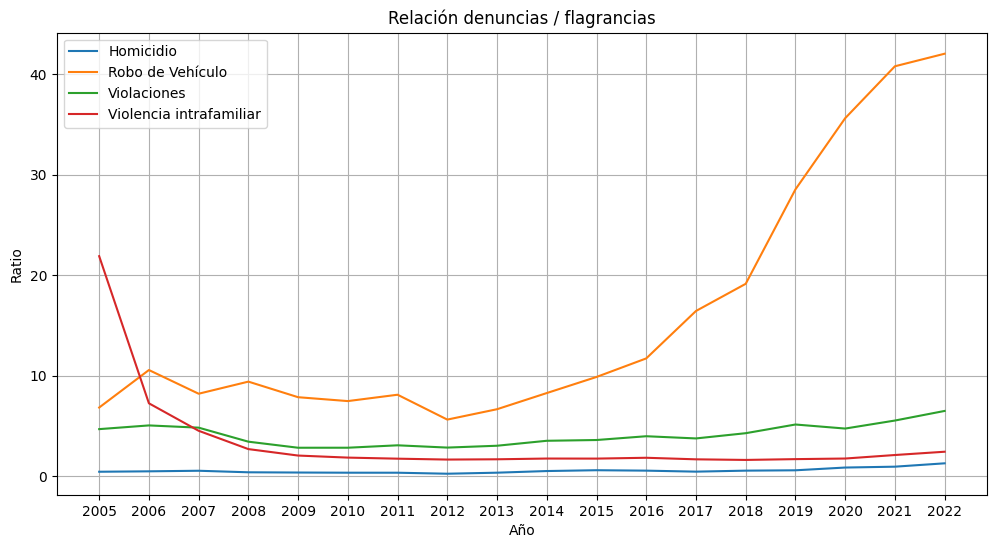

In [43]:
# creamos el grafico y mostramos, iterando sobre cada método de la clase / create and show the plot iterating between methods of the class

plt.figure(figsize=(12, 6))
plt.xticks(merged_df['Año'], merged_df['Año'])

for ratio, delito in zip(graficos_delitos, lista_ratio):
    ploteoratio = Ploteorelacion(delito)
    ploteoratio.ploteo(ratio)

plt.show()

In [44]:
# lista de ratios de grupo de violencia intrafamiliar / list of ratios for types of domestic violence
ratio_violencia = [
    'Violencia intrafamiliar a adulto mayor',
    'Violencia intrafamiliar a hombre',
    'Violencia intrafamiliar a mujer',
    'Violencia intrafamiliar a niño',
]

In [45]:
# nuevamente iteramos y añadimos a la lista vacía los resultados / once again we iterate and append the results to a new blank list

graficos_violencia = []

for delito in ratio_violencia:
    ploteoratio = Ploteorelacion(delito)
    df_resultadorelacion = ploteoratio.calcular_ratio()
    graficos_violencia.append(df_resultadorelacion)

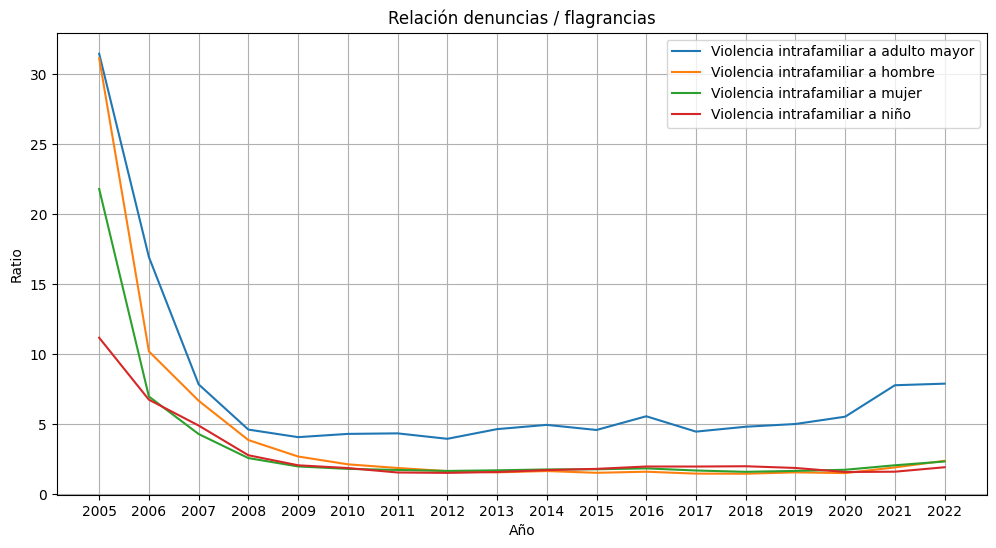

In [46]:
# finalmente iteramos sobre esta lista nueva para obtener el grafico / finally we iterate over the new list to create the plot

plt.figure(figsize=(12, 6))
plt.xticks(merged_df['Año'], merged_df['Año'])

for ratio, delito in zip(graficos_violencia, ratio_violencia):
    ploteoratio = Ploteorelacion(delito)
    ploteoratio.ploteo(ratio)

plt.show()